# Physics 8805
## Learning from Data: Bayesian Methods and Machine Learning
### Autumn, 2019 
$% Some LaTeX definitions we'll use.
\newcommand{\pr}{\textrm{p}}
$

# Linear algebra games including SVD for PCA

Some parts adapted from [Computational-statistics-with-Python.ipynb](https://github.com/cliburn/Computational-statistics-with-Python), which is itself from a course taught at Duke University; other parts from Peter Mills' [blog](https://blog.statsbot.co/singular-value-decomposition-tutorial-52c695315254).  

The goal here is to practice some linear algebra manipulations by hand and with Python, and to gain some experience and intuition with the Singular Value Decomposition (SVD).
$\newcommand{\Amat}{\mathbf{A}} \newcommand{\AmatT}{\mathbf{A^\top}}
\newcommand{\thetavec}{\boldsymbol{\theta}}
\newcommand{\Sigmamat}{\mathbf{\Sigma}}
\newcommand{\Yvec}{\mathbf{Y}}
$

## Preliminary exercise: manipulations using the index form of matrices

Warm up (you may already have done this earlier in 8805): prove that the Maximum Likelihood Estimate (MLE) for $\chi^2$ given by 

$$
\chi^2 = (\Yvec - \Amat\thetavec)^{\mathbf{\top}} \Sigmamat^{-1} (\Yvec - \Amat\thetavec)
$$

is 

$$
\thetavec_{\mathrm{MLE}} = (\AmatT \Sigmamat^{-1} \Amat)^{-1} (\AmatT \Sigmamat^{-1} \Yvec)  \;.
$$

Here $\thetavec$ is a $m\times 1$ matrix of parameters (i.e., there are $m$ parameters), $\Sigmamat$ is the $m\times m$ covariance matrix, $\Yvec$ is a $N\times 1$ matrix of observations (data), and $\Amat$ is an $N\times m$ matrix 

$$
\Amat = 
\left(
\begin{array}{cccc}
   1  & x_1  & x_1^2 & \cdots \\
   1  & x_2  & x_2^2 & \cdots \\
   \vdots & \vdots & \vdots &\cdots \\
   1  & x_N  & x_N^2 & \cdots
\end{array}
\right)
$$

where $N$ is the number of observations.  The idea is to do this with explicit indices for vectors and matrices, using the Einstein summation convention.  

A suggested approach:
* Write $\chi^2$ in indices: $\chi^2 = (Y_i - A_{ij}\theta_j)\Sigma^{-1}_{ii'}(Y_{i'}- A_{i'j'}\theta_{j'})$, where summations over repeated indices are implied (be careful of transposes and using enough independent indices).  *How do we see that $\chi^2$ is a scalar?*
* Find $\partial\chi^2/\partial \theta_k = 0$ for all $k$, using $\partial\theta_j/\partial\theta_k = \delta_{jk}$. Isolate the terms with one component of $\thetavec$ from those with none.
* You should get the matrix equation $ (\AmatT \Sigmamat^{-1} \Yvec) = (\AmatT \Sigmamat^{-1} \Amat)\thetavec$. At this point you can directly solve for $\thetavec$. *Why can you do this now?*
* If you get stuck, see the 8805 Lecture 11 notes.

## SVD basics

Note: we will used the "reduced SVD" here, for which the matrix of singular values is square. The formal discussion of the SVD usually works with the "full SVD", the "reduced SVD" is more typically used in practice. 

A singular value decomposition (SVD) decomposes a matrix $A$ into three other matrices (we'll skip the boldface font here):

$$
A = U S V^\top
$$

where (take $m > n$ for now)
* $A$ is an $m\times n$ matrix;
* $U$ is an $m\times n$ (semi)orthogonal matrix;
* $S$ is an $n\times n$ diagonal matrix;
* $V$ is an $n\times n$ orthogonal matrix.

Comments and tasks:
* *Verify that these dimensions are compatible with the decomposition of $A$.*  
* The `scipy.linalg` function `svd` has a Boolean argument `full_matrices`.  If `False`, it returns the decomposition above with matrix dimensions as stated, which is the "reduced SVD".  If `True`, then $U$ is $m\times m$, $S$ is $m \times n$, and $V$ is $n\times n$.  We will use the `full_matrices = False` form here.  *Can you see why this is ok?*
* Note that semi-orthogonal means that $U^\top U = I_{n\times n}$ and orthogonal means $V V^\top = V^\top V = I_{n\times n}$.  
* In index form, the decomposition of $A$ is $A_{ij} = U_{ik} S_k V_{jk}$, where the diagonal matrix elements of $S$ are 
$S_k$ (*make sure you agree*).
* These diagonal elements of $S$, namely the $S_k$, are known as **singular values**.  They are ordinarily arranged from largest to smallest.
* $A A^\top = U S^2 U^\top$, which implies (a) $A A^\top U = U S^2$.
* $A^\top A = V S^2 V^\top$, which implies (b) $A^\top A V = V S^2$.
* If $m > n$, we can diagonalize $A^\top A$ to find $S^2$ and $V$ and then find $U = A V S^{-1}$.  If $m < n$ we switch the roles of $U$ and $V$.

Quick demonstations for you to do or questions to answer:
* *Show from equations (a) and (b) that $U$ is semi-orthogonal and $V$ is orthogonal and that the eigenvalues, $\{S_i^2\}$, are all positive.*
* *Show that if $m < n$ there will be at most $m$ non-zero singular values.* 
* *Show that the eigenvalues from equations (a) and (b) must be the same.*

A key feature of the SVD for us here is that the sum of the squares of the singular values equals the total variance in $A$, i.e., the sum of squares of all matrix elements (squared Frobenius norm). Thus the size of each says how much of the total variance is accounted for by each singular vector.  We can create a truncated SVD containing a percentage (e.g., 99%) of the variance:

$$
  A_{ij} \approx \sum_{k=1}^{p} U_{ik} S_k V_{jk}
$$

where $p < n$ is the number of singular values included. Typically this is not a large number.

### Solving matrix equations with SVD

We can solve for $\mathbf{x}$:

$$\begin{align}
  A \mathbf{x} &= b \\
  \mathbf{x} &= V S^{-1} U^\top b
\end{align}$$

or $x_i = \sum_j \frac{V_{ij}}{S_j} \sum_k U_{kj} b_k$.  The value of this solution method is when we have an ill-conditioned matrix, meaning that the smallest eigenvalues are zero or close to zero.  We can throw away the corresponding components and all is well! See [also](https://personalpages.manchester.ac.uk/staff/timothy.f.cootes/MathsMethodsNotes/L3_linear_algebra3.pdf). 

Comments:
- If we have a non-square matrix, it still works. If $m\times n$ with $m > n$, then only $n$ singular values.
- If $m < n$, then only $m$ singular values.
- This is like solving 

$$A^\top A \mathbf{x} = A^\top b$$

which is called the *normal equation*.  It produces the solution to $\mathbf{x}$ that is closest to the origin, or

$$
  \min_{\mathbf{x}} |A\mathbf x - b| \;.
$$

**Task:** *prove these results (work backwards from the last equation as a least-squares minimization)*.

### Data reduction

For machine learning (ML), there might be several hundred variables but the algorithms are made for a few dozen.  We can use SVD in ML for variable reduction.  This is also the connection to sloppy physics models.  In general, our matrix $A$ can be closely approximated by only keeping the largest of the singular values.  We'll see that visually below using images.

## Python imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

from sklearn.decomposition import PCA

*Generate random matrices and verify the properties for SVD given above.  Check what happens when $m > n$.*

In [2]:
A = np.random.rand(9, 4)
print('A = ', A)

Ap = np.random.randn(5, 3)
print('Ap = ', Ap)

A =  [[0.43153564 0.06274324 0.322907   0.3792709 ]
 [0.76253177 0.71996736 0.12608242 0.87144381]
 [0.4474337  0.28492027 0.99991773 0.3463532 ]
 [0.67431104 0.52595835 0.20315753 0.09977442]
 [0.56216604 0.14426291 0.03149379 0.29250856]
 [0.44348015 0.74548293 0.32208721 0.0149387 ]
 [0.15623177 0.72568476 0.00790468 0.39974764]
 [0.53047259 0.02310322 0.4962828  0.53803712]
 [0.01474707 0.20516322 0.06199624 0.21542274]]
Ap =  [[ 0.86558109  1.60891309 -0.73544143]
 [ 1.0535218  -0.91128828  0.52442518]
 [ 0.87249705  0.67814206 -0.13317315]
 [ 0.76751238  0.43126758 -0.20047344]
 [ 0.43298676  0.69684983 -0.76903444]]


Check the definition of `scipy.linalg.svd` with shift-tab-tab.

In [3]:
# SVD from scipy.linalg
U, S, V_trans = la.svd(A, full_matrices=False)
Up, Sp, Vp_trans = la.svd(Ap, full_matrices=False)

In [4]:
print(U.shape, S.shape, V_trans.shape)

(9, 4) (4,) (4, 4)


In [5]:
# Transpose with T, matrix multiplication with @
print(U.T @ U)

[[ 1.00000000e+00  1.48633827e-16 -8.51475537e-17  7.76206971e-18]
 [ 1.48633827e-16  1.00000000e+00  2.77565079e-16  2.91790865e-16]
 [-8.51475537e-17  2.77565079e-16  1.00000000e+00 -1.85095691e-16]
 [ 7.76206971e-18  2.91790865e-16 -1.85095691e-16  1.00000000e+00]]


In [6]:
# Here's one way to suppress small numbers from round-off error
np.around(U.T @ U, decimals=15)

array([[ 1.,  0., -0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [-0.,  0.,  1., -0.],
       [ 0.,  0., -0.,  1.]])

In [7]:
# Predict this one before evaluating!
print(U @ U.T)

[[ 0.17288036  0.14410757  0.14488775  0.03528804  0.14635075 -0.09055345
  -0.09489953  0.24749393 -0.01050758]
 [ 0.14410757  0.60684095 -0.10520543  0.05039371  0.2033996  -0.03244702
   0.33029135  0.18304549  0.13852104]
 [ 0.14488775 -0.10520543  0.77966487 -0.02432675 -0.16750075  0.18763548
   0.00837037  0.26637312  0.06961935]
 [ 0.03528804  0.05039371 -0.02432675  0.51267569  0.26890632  0.37991477
  -0.09411839 -0.03220511 -0.13755537]
 [ 0.14635075  0.2033996  -0.16750075  0.26890632  0.34519112 -0.01857372
  -0.16882629  0.15018469 -0.10711873]
 [-0.09055345 -0.03244702  0.18763548  0.37991477 -0.01857372  0.54717517
   0.16960406 -0.17217018 -0.0150456 ]
 [-0.09489953  0.33029135  0.00837037 -0.09411839 -0.16882629  0.16960406
   0.54594765 -0.120315    0.22162724]
 [ 0.24749393  0.18304549  0.26637312 -0.03220511  0.15018469 -0.17217018
  -0.120315    0.37171678  0.01090869]
 [-0.01050758  0.13852104  0.06961935 -0.13755537 -0.10711873 -0.0150456
   0.22162724  0.010908

Go on and check the other claimed properties.  

For example, is $A = U S V^\top$? (Note: you'll need to make $S$ a matrix with `np.diag(S)`.)

In [8]:
# Check the other properties, changing the matrix size and shapes.



For a square matrix, compare the singular values in $S$ to the eigenvalues from `la.eig`.  What do you conclude?  Now try this for a symmetric matrix (note that a matrix plus its transpose is symmetric).

## SVD applied to images for compression

Read in `figs/elephant.jpg` as a gray-scale image. The image has $1066 \times 1600$ values. Using SVD, recreate the image with a relative error of less than 0.5%. What is the relative size of the compressed image as a percentage?

shape of img:  (1066, 1600)


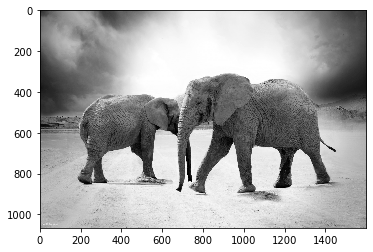

In [9]:
from skimage import io

img = io.imread('figs/elephant.jpg', as_gray=True)
plt.imshow(img, cmap='gray');
print('shape of img: ', img.shape)

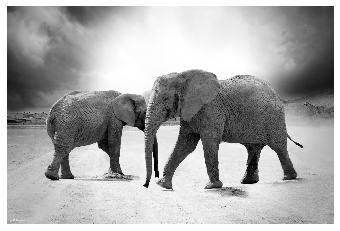

In [10]:
# turn off axis
plt.imshow(img, cmap='gray')
plt.gca().set_axis_off()

In [11]:
# Do the svg
U, S, Vt = la.svd(img, full_matrices=False)

In [12]:
# Check the shapes
U.shape, S.shape, Vt.shape

((1066, 1066), (1066,), (1066, 1600))

(1066, 1600)


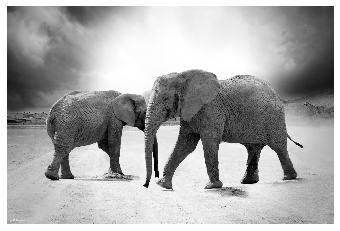

In [14]:
# Check that we can recreate the image
img_orig = U @ np.diag(S) @ Vt
print(img_orig.shape)
plt.imshow(img_orig, cmap='gray')
plt.gca().set_axis_off()

Here's how we can efficiently reduce the size of the matrices.  Our SVD should be sorted, so we are keeping only the largest singular values up to a point.

In [15]:
# Pythonic way to figure out when we've accumulated 99.5% of the result
k = np.sum(np.cumsum((S**2)/(S**2).sum()) <= 0.995)

#### Aside: dissection of the Python statement to find the index for accumulation

In [16]:
test = np.array([5, 4, 3, 2, 1])
threshold = 0.995
print('initial matrix, in descending magnitude: ', test)
print( 'fraction of total sum of squares: ', (test**2) / (test**2).sum() )
print( 'cumulative fraction: ', np.cumsum((test**2) / (test**2).sum()) )
print( 'mark entries as true if less than or equal to threshold: ',
       (np.cumsum((test**2) / (test**2).sum()) <= threshold) )
print( 'sum up the Trues: ',
       np.sum(np.cumsum((test**2) / (test**2).sum()) <= threshold) )
print( 'The last result is the index we are looking for.')

initial matrix, in descending magnitude:  [5 4 3 2 1]
fraction of total sum of squares:  [0.45454545 0.29090909 0.16363636 0.07272727 0.01818182]
cumulative fraction:  [0.45454545 0.74545455 0.90909091 0.98181818 1.        ]
mark entries as true if less than or equal to threshold:  [ True  True  True  True False]
sum up the Trues:  4
The last result is the index we are looking for.


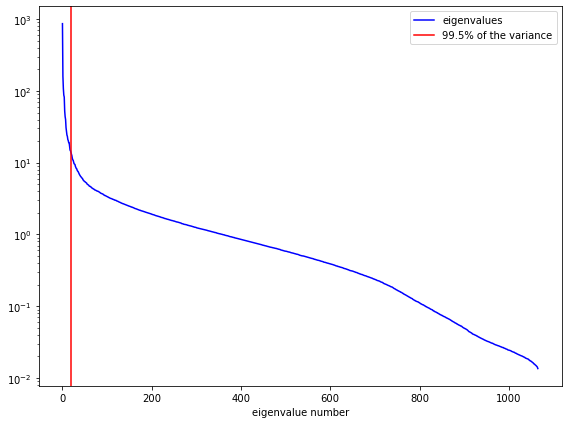

In [17]:
# Let's plot the eigenvalues and mark where k is
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.semilogy(S, color='blue', label='eigenvalues')
ax.axvline(k, color='red', label='99.5% of the variance');
ax.set_xlabel('eigenvalue number')
ax.legend()
fig.tight_layout()

Now keep only the most significant eigenvalues (those up to k).

In [18]:
img2 = U[:,:k] @ np.diag(S[:k])@ Vt[:k, :]
img2.shape

(1066, 1600)

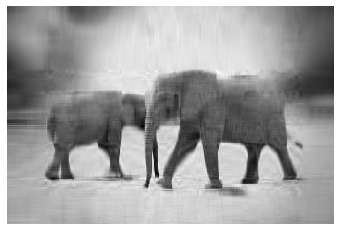

In [19]:
plt.imshow(img2, cmap='gray')
plt.gca().set_axis_off();

In [20]:
k99 = np.sum(np.cumsum((S**2)/(S**2).sum()) <= 0.99)
img99 = U[:,:k99] @ np.diag(S[:k99])@ Vt[:k99, :]

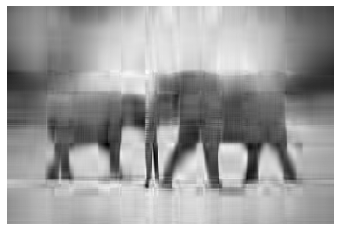

In [21]:
plt.imshow(img99, cmap='gray')
plt.gca().set_axis_off();

Let's try another interesting picture . . .

U shape: (3088, 2320), S shape: (2320,), V shape: (2320, 2320)
k995 = 24
img995 shape = (3088, 2320)
U shape: (3088, 24), S shape: (24,), V shape: (2320, 24)


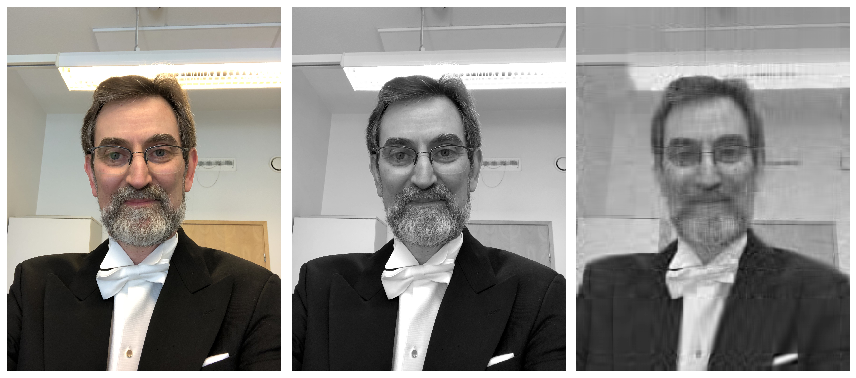

In [22]:
fraction_kept = 0.995

def svd_shapes(U, S, V, k=None):
    if k is None:
        k = len(S)
    U_shape = U[:,:k].shape
    S_shape = S[:k].shape
    V_shape = V[:,:k].shape
    print(f'U shape: {U_shape}, S shape: {S_shape}, V shape: {V_shape}')


img_orig = io.imread('figs/Dick_in_tailcoat.jpg')
img = io.imread('figs/Dick_in_tailcoat.jpg', as_gray=True)

U, S, V = la.svd(img)
svd_shapes(U, S, V)

k995 = np.sum(np.cumsum((S**2)/(S**2).sum()) <= fraction_kept)
print(f'k995 = {k995}')
img995 = U[:,:k995] @ np.diag(S[:k995])@ V[:k995, :]
print(f'img995 shape = {img995.shape}')
svd_shapes(U, S, V, k995)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img_orig)
ax1.set_axis_off()

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img, cmap='gray')
ax2.set_axis_off()

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(img995, cmap='gray')
ax3.set_axis_off()

fig.tight_layout()

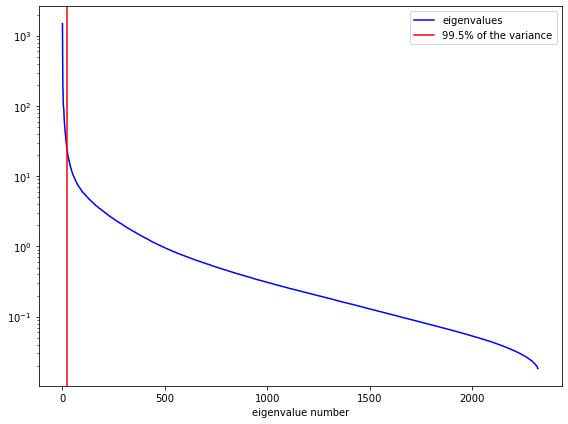

In [23]:
# Let's plot the eigenvalues and mark where k is
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.semilogy(S, color='blue', label='eigenvalues')
ax.axvline(k995, color='red', label='99.5% of the variance');
ax.set_xlabel('eigenvalue number')
ax.legend()
fig.tight_layout()

### Things to do:

* Get your own figure and duplicate these results.  Then play!
* As you reduce the percentage of the variance kept, what features of the image are retained and what are lost?
* See how small you can make the percentage and still recognize the picture.
* How is this related to doing a spatial Fourier transform, applying a low-pass filter, and transforming back.  (Experts: try this!)

## Covariance, PCA and SVD

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la

np.set_printoptions(precision=3)

Recall the formula for covariance

$$
\text{Cov}(X, Y) = \frac{\sum_{i=1}^n(X_i - \bar{X})(Y_i - \bar{Y})}{n-1}
$$

where $\text{Cov}(X, X)$ is the sample variance of $X$.

In [25]:
def cov(x, y):
    """Returns covariance of vectors x and y)."""
    xbar = x.mean()
    ybar = y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

In [26]:
X = np.random.random(10)
Y = np.random.random(10)

In [27]:
np.array([[cov(X, X), cov(X, Y)], [cov(Y, X), cov(Y,Y)]])

array([[ 0.049, -0.012],
       [-0.012,  0.135]])

In [28]:
np.cov(X, Y)  # check against numpy

array([[ 0.049, -0.012],
       [-0.012,  0.135]])

In [29]:
# Extension to more variables is done in a pair-wise way
Z = np.random.random(10)
np.cov([X, Y, Z])

array([[ 0.049, -0.012,  0.04 ],
       [-0.012,  0.135,  0.018],
       [ 0.04 ,  0.018,  0.083]])

### Eigendecomposition of the covariance matrix

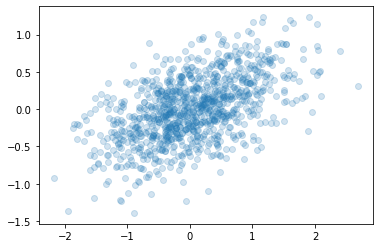

In [30]:
# Zero mean but off-diagonal correlation matrix
mu = [0,0]
sigma = [[0.6,0.2],[0.2,0.2]]
n = 1000
x = np.random.multivariate_normal(mu, sigma, n).T
plt.scatter(x[0,:], x[1,:], alpha=0.2);

In [31]:
# Find the covariance matrix of the matrix of points x
A = np.cov(x)

In [32]:
# m = np.array([[1,2,3],[6,5,4]])
# ms = m - m.mean(1).reshape(2,1)
# np.dot(ms, ms.T)/2

In [33]:
# Find the eigenvalues and eigenvectors
e, v = la.eigh(A)

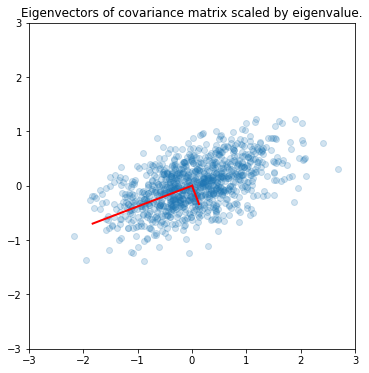

In [34]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(x[0,:], x[1,:], alpha=0.2)
for e_, v_ in zip(e, v.T):
    ax.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
ax.axis([-3,3,-3,3])
ax.set_aspect(1)
ax.set_title('Eigenvectors of covariance matrix scaled by eigenvalue.');

### PCA (from Duke course)

"Principal Components Analysis" (PCA) basically means to find and rank all the eigenvalues and eigenvectors of a covariance matrix. This is useful because high-dimensional data (with $p$ features) may have nearly all their variation in a small number of dimensions $k<p$, i.e. in the subspace spanned by the eigenvectors of the covariance matrix that have the $k$ largest eigenvalues. If we project the original data into this subspace, we can have a dimension reduction (from $p$ to $k$) with hopefully little loss of information.

Numerically, PCA is typically done using SVD on the data matrix rather than eigendecomposition on the covariance matrix. Numerically, the condition number for working with the covariance matrix directly is the square of the condition number using SVD, so SVD minimizes errors."

For zero-centered vectors,

\begin{align}
\text{Cov}(X, Y) &= \frac{\sum_{i=1}^n(X_i - \bar{X})(Y_i - \bar{Y})}{n-1} \\
  &= \frac{\sum_{i=1}^nX_iY_i}{n-1} \\
  &= \frac{XY^T}{n-1}
\end{align}

and so the covariance matrix for a data set $X$ that has zero mean in each feature vector is just $XX^T/(n-1)$. 

In other words, we can also get the eigendecomposition of the covariance matrix from the positive semi-definite matrix $XX^T$.

Note: Here $x$ is a matrix of **row** vectors.

In [37]:
X = np.random.random((5,4))
X

array([[0.901, 0.651, 0.421, 0.011],
       [0.238, 0.221, 0.885, 0.209],
       [0.461, 0.808, 0.663, 0.128],
       [0.12 , 0.46 , 0.714, 0.105],
       [0.907, 0.371, 0.575, 0.781]])

In [38]:
Y = X - X.mean(axis=1)[:, None]  # eliminate the mean
print(Y.mean(axis=1))

[ 0.000e+00  2.776e-17 -2.776e-17 -2.776e-17  2.776e-17]


In [39]:
np.around(Y.mean(1), 5)

array([ 0.,  0., -0., -0.,  0.])

In [40]:
Y

array([[ 0.405,  0.155, -0.075, -0.485],
       [-0.15 , -0.168,  0.497, -0.179],
       [-0.054,  0.293,  0.148, -0.387],
       [-0.23 ,  0.11 ,  0.364, -0.245],
       [ 0.248, -0.288, -0.083,  0.123]])

Check that the covariance matrix is unaffected by removing the mean:

In [41]:
np.cov(X)

array([[ 0.143, -0.012,  0.067,  0.005,  0.001],
       [-0.012,  0.11 ,  0.034,  0.08 , -0.017],
       [ 0.067,  0.034,  0.087,  0.064, -0.052],
       [ 0.005,  0.08 ,  0.064,  0.086, -0.05 ],
       [ 0.001, -0.017, -0.052, -0.05 ,  0.055]])

In [42]:
np.cov(Y)

array([[ 0.143, -0.012,  0.067,  0.005,  0.001],
       [-0.012,  0.11 ,  0.034,  0.08 , -0.017],
       [ 0.067,  0.034,  0.087,  0.064, -0.052],
       [ 0.005,  0.08 ,  0.064,  0.086, -0.05 ],
       [ 0.001, -0.017, -0.052, -0.05 ,  0.055]])

In [43]:
# Find the eigenvalue and eigenvectors
e1, v1 = np.linalg.eig(np.dot(x, x.T)/(n-1))

#### Principal components

Principal components are simply the eigenvectors of the covariance matrix used as basis vectors. Each of the original data points is expressed as a linear combination of the principal components, giving rise to a new set of coordinates. 

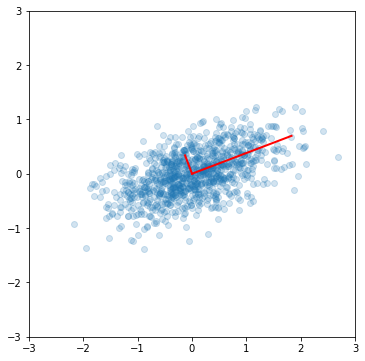

In [44]:
# Check that we reproduce the previous result
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(x[0,:], x[1,:], alpha=0.2)
for e_, v_ in zip(e1, v1.T):
    ax.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
ax.axis([-3,3,-3,3]);
ax.set_aspect(1)


### Using SVD for PCA

SVD is a decomposition of the data matrix $X = U S V^T$ where $U$ and $V$ are orthogonal matrices and $S$ is a diagonal matrix. 

Recall that the transpose of an orthogonal matrix is also its inverse, so if we multiply on the right by $X^T$, we get the following simplification

\begin{align}
X &= U S V^T \\
X X^T &= U S V^T (U S V^T)^T \\
 &= U S V^T V S U^T \\
 &= U S^2 U^T
\end{align}

Compare with the eigendecomposition of a matrix $A = W \Lambda W^{-1}$, we see that SVD gives us the eigendecomposition of the matrix $XX^T$, which as we have just seen, is basically a scaled version of the covariance for a data matrix with zero mean, with the eigenvectors given by $U$ and eigenvalues by $S^2$ (scaled by $n-1$)..

In [45]:
u, s, v = np.linalg.svd(x)

AttributeError: module 'matplotlib.pyplot' has no attribute 'aspect'

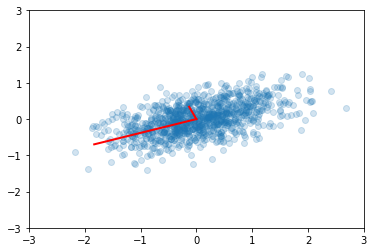

In [52]:
# reproduce previous results yet again!
e2 = s**2/(n-1)
v2 = u
plt.scatter(x[0,:], x[1,:], alpha=0.2)
for e_, v_ in zip(e2, v2):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);
plt.aspect(1)

In [47]:
v1 # from eigenvectors of covariance matrix

array([[ 0.935, -0.356],
       [ 0.356,  0.935]])

In [48]:
v2 # from SVD

array([[-0.935, -0.356],
       [-0.356,  0.935]])

In [49]:
e1 # from eigenvalues of covariance matrix

array([0.653, 0.121])

In [50]:
e2 # from SVD

array([0.653, 0.121])

## Exercises: covariance matrix manipulations in Python (taken from the Duke course)

Given the following covariance matrix
```python
A = np.array([[2,1],[1,4]])
```
use Python to do these basic tasks (that is, do not do them by hand but use `scipy.linalg` functions).

1. Show that the eigenvectors of $A$ are orthogonal. 
1. What is the vector representing the first principal component direction? 
1. Find $A^{-1}$ without performing a matrix inversion. 
1. What are the coordinates of the data points (0, 1) and (1, 1) in the standard basis expressed as coordinates of the principal components? 
1. What is the proportion of variance explained if we keep only the projection onto the first principal component? 

We'll give you a headstart on the Python manipulations (you should take a look at the `scipy.linalg` documentation).

In [ ]:
A = np.array([[2,1],[1,4]])
eigval, eigvec = la.eig(A)

- Find the matrix $A$ that results in rotating the standard vectors in $\mathbb{R}^2$ by 30 degrees counter-clockwise and stretches $e_1$ by a factor of 3 and contracts $e_2$ by a factor of $0.5$. 
- What is the inverse of this matrix? How you find the inverse should reflect your understanding.

The effects of the matrix $A$ and $A^{-1}$ are shown in the figure below:

![image](figs/vecs.png)

We observe some data points $(x_i, y_i)$, and believe that an appropriate model for the data is that

$$
f(x) = ax^2 + bx^3 + c\sin{x}
$$

with some added noise. Find optimal values of the parameters $\beta = (a, b, c)$ that minimize $\Vert y - f(x) \Vert^2$

1. using `scipy.linalg.lstsq` 
2. solving the normal equations $X^TX \beta = X^Ty$ 
3. using `scipy.linalg.svd` 

In each case, plot the data and fitted curve using `matplotlib`.

Data
```
x = array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])
```

In [ ]:
x = np.array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = np.array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])